In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-video-game-sales-ratings/Tagged-Data-Final.csv
/kaggle/input/global-video-game-sales-ratings/Cleaned Data 2.csv
/kaggle/input/global-video-game-sales-ratings/Raw Data.csv


In [2]:
import pandas as pd
games = pd.read_csv('/kaggle/input/global-video-game-sales-ratings/Raw Data.csv')

In [3]:
print(games.head(), games.shape)

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [4]:
games_svy = games.dropna(subset = ['Year_of_Release', 'Global_Sales']).copy()

In [5]:
games_svy['Year_of_Release'] = games_svy['Year_of_Release'].astype('int')

In [6]:
games_svy_new = games_svy.groupby('Year_of_Release', as_index=False).agg({'Global_Sales': 'sum'})

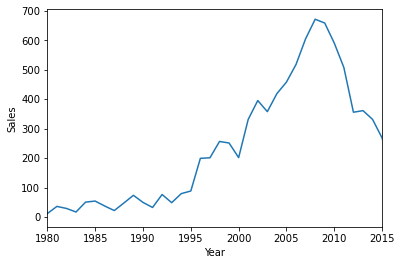

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='Year_of_Release', y='Global_Sales', data=games_svy_new)
plt.xlim([1980, 2015])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [8]:
S_N = {'3DS', 'DS', 'GBA', 'GC', 'Wii', 'WiiU', 'SNES', '3DS', 'N64'}
S_P = {'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'}
S_X = {'X360', 'XB', 'XOne'}
S_S = {'DC'}
#Make new dicts to map Nintendo systemts to 'Nintendo', Playstations systems to 'PlayStaions', etc.
d_N = dict.fromkeys(S_N, 'Nintendo') 
d_P = dict.fromkeys(S_P, 'PlayStation')
d_X = dict.fromkeys(S_X, 'XBox')
d_S = dict.fromkeys(S_S, 'SEGA')

games['Console_Manufacturer'] = games['Platform'].map({**d_N, **d_P, **d_X, **d_S, 'PC':'PC'})

In [9]:
games_cr = games.dropna(subset=['Critic_Score']).copy()

In [10]:
games_mvc = games_cr.groupby('Console_Manufacturer', as_index=False).agg({'Critic_Score': 'mean'}).sort_values('Critic_Score')

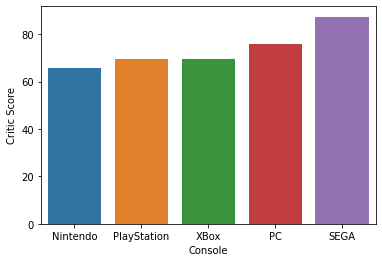

In [11]:
sns.barplot(x='Console_Manufacturer', y='Critic_Score', data=games_mvc)
plt.xlabel('Console')
plt.ylabel('Critic Score')
plt.show()

In [12]:
games_cr_pub = games_cr.dropna(subset=['Publisher']).copy() #Drop rows with NaN in Publisher column
q = games_cr_pub['Publisher'].value_counts() 
top_publishers = list(q[q>100].index) #Pick the publishers with more than 100 games and put them into a list

games_cr_toppub = games_cr_pub[games_cr_pub['Publisher'].isin(top_publishers)] #Subset the rows from top_publishers
games_cr_toppub_sorted = games_cr_toppub.groupby('Publisher', as_index=False).agg({'Critic_Score':'mean'}).sort_values('Critic_Score')#Sort by Critic_Score

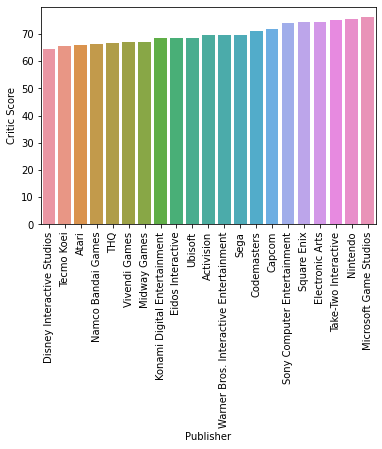

In [13]:
sns.barplot(x='Publisher', y='Critic_Score', data= games_cr_toppub_sorted)
plt.xticks(rotation=90)
plt.ylabel('Critic Score')
plt.show()